## Day 22 Lecture 1 Assignment

In this assignment, we will do some EDA to uncover basic patterns in our datasets. We will be using both the FIFA ratings dataset and the Chicago traffic crash dataset.

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from scipy import stats 

warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
crash_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/traffic_crashes_chicago.csv')
soccer_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/fifa_ratings.csv')

In [ ]:
soccer_data.head()

,ID,Name,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,158023,L. Messi,94,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26
1,20801,Cristiano Ronaldo,94,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23
2,190871,Neymar Jr,92,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33
3,192985,K. De Bruyne,91,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51
4,183277,E. Hazard,91,81,84,61,89,80,95,83,79,83,94,94,88,95,90,94,82,56,83,66,80,54,41,87,89,86,91,34,27,22


We will start with the FIFA dataset, which consists entirely of numeric features (we will ignore the player ID and name). Create a histogram of each numeric column in the dataset. What do you notice about the distributions of scores? Are there any particular distributions that jump out?

In [ ]:
soccer_data.drop(['ID', 'Name'], axis=1, inplace=True)

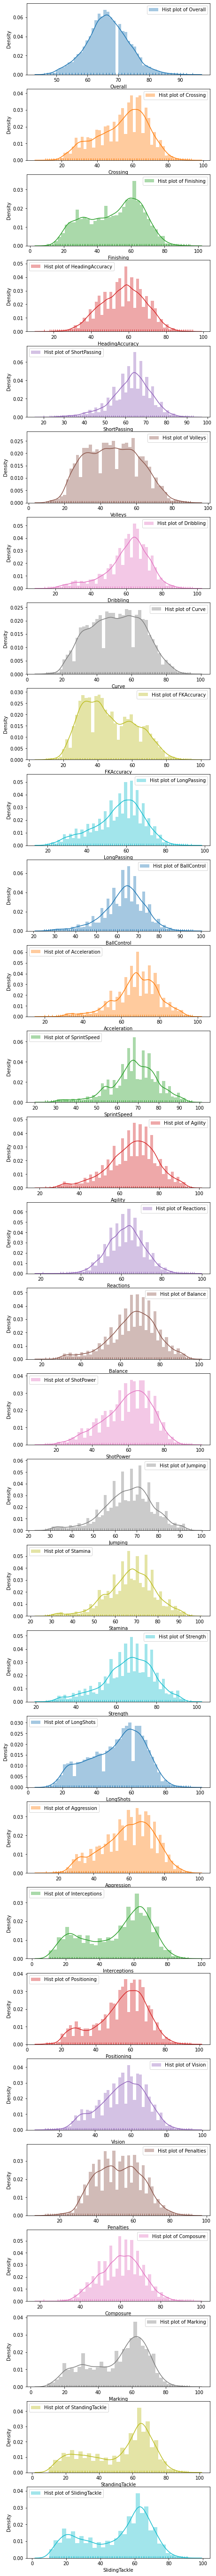

In [ ]:
# answer goes here
colors = plt.rcParams['axes.prop_cycle']()
plt.figure(figsize=(7,100))
rows = len(soccer_data.columns)
for i,col in enumerate(soccer_data.columns):
  plt.subplot(rows,1,i+1)
  c = next(colors)['color']
  sns.distplot(soccer_data[col], color=c, rug=True, label=f'Hist plot of {col}')
  plt.legend()

plt.show()


All the values are percents that range from 0 to 100.

Next, generate pairplots between the Overall rating and the other numeric features (i.e. Overall-Crossing, Overall-Finishing....Overall-SlidingTackle). Are the results what you would expect, visually speaking? What are the strongest correlations that jump out?

This dataset has many columns, so it may help to split up the pairwise scatterplots across two or three visuals. In addition, the scatterplots will probably be too crowded to be informative if the full dataset is used, so using a sample of the rows is advisable as well.

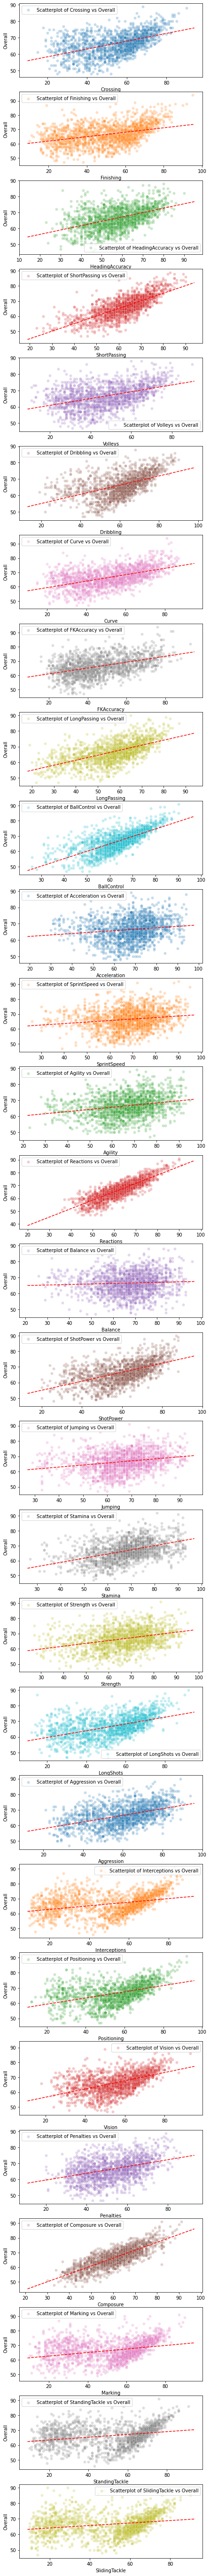

In [ ]:
# answer goes here
colors = plt.rcParams['axes.prop_cycle']()
plt.figure(figsize=(7,100))
rows = len(soccer_data.columns)-1
for i,col in enumerate([col for col in soccer_data.columns if col not in ['Overall']]):
  plt.subplot(rows,1,i+1)
  c = next(colors)['color']
  sample = soccer_data[[col, 'Overall']].sample(n=(soccer_data.shape[0]//10))
  sns.scatterplot(x=sample[col], 
                  y=sample['Overall'],
                  color=c, alpha=0.25, label=f'Scatterplot of {col} vs Overall')
  slope, intercept, r_value, p_value, std_err = stats.linregress(soccer_data[col], soccer_data['Overall'])
  x_lr = np.linspace(soccer_data[col].min()-1,soccer_data[col].max()+1,100)
  y_lr = (slope*x_lr)+intercept
  plt.plot(x_lr, y_lr, '--r')
  plt.legend()

plt.show()

Most of the columns have a positive correlation with Overall. A few in particular with strong correlations are Reactions, BallControl, and ShortPassing.

Plot a correlation matrix between all of the numeric columns. A heatmap is an effective way to do so. Which pairs of features stand out as having exceptionally strong correlations, both positive and/or negative?

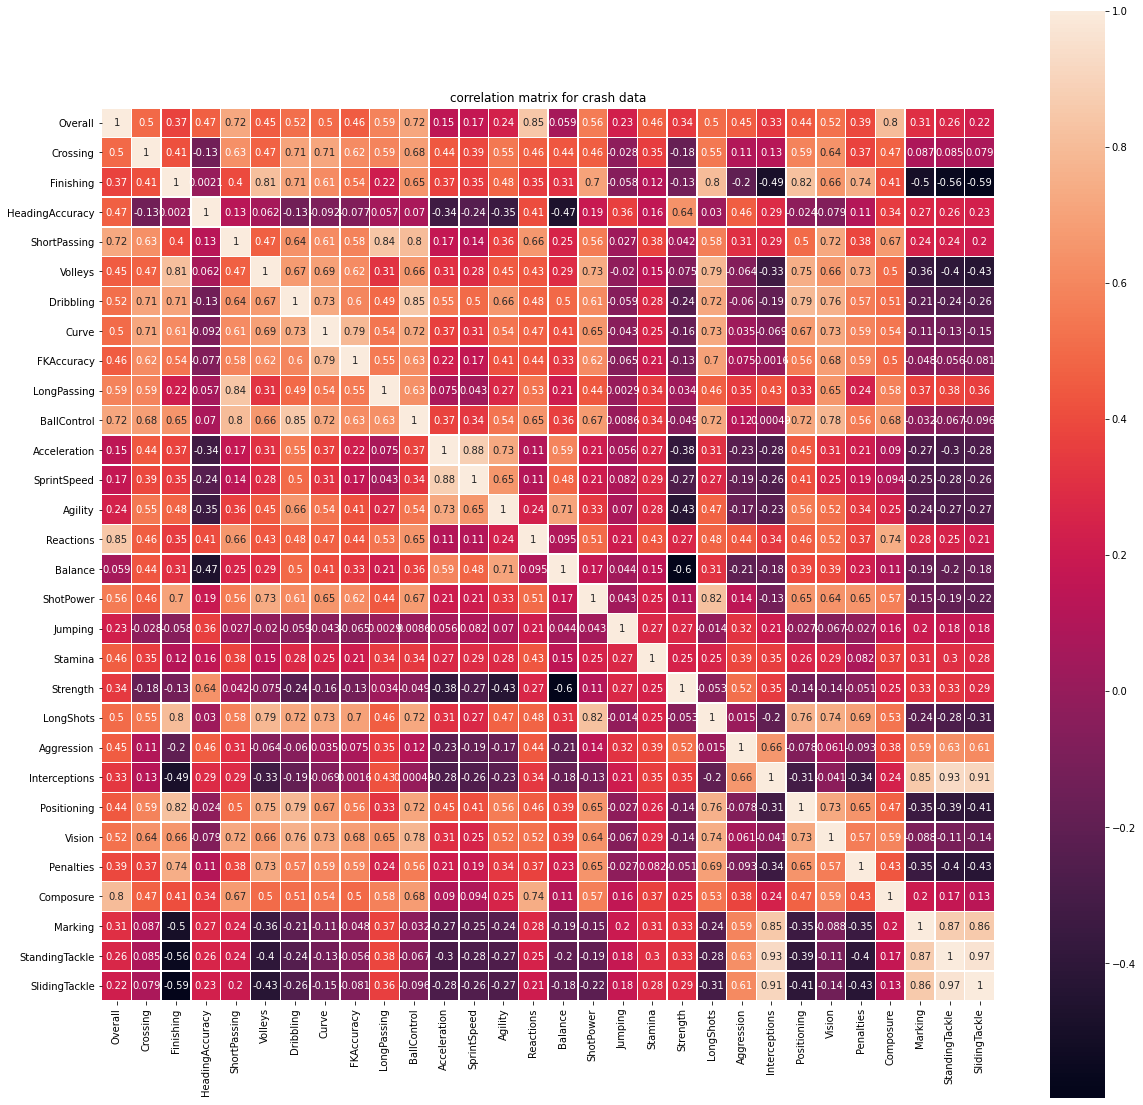

In [ ]:
# answer goes here
cormat = soccer_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cormat, square=True, annot=True, linewidths=.5)
plt.title('correlation matrix for crash data')
plt.show()

Finally, create a pairplot using the numeric features in the dataset (i.e. scatterplots between pairs of features, rather than between Overall and the other features). Are the graphs visually consistent with what you would expect from the correlation heatmap?

Note: there are too many numeric features to realistically generate a pairplot between all of them, so choose a subset. Choosing a fixed number of consecutive columns is fine (e.g. 10 through 20); you can also use the results of the correlation heatmap to guide your choices of columns. As with the previous exercise, using a sample of rows is recommended.

<Figure size 1440x1440 with 0 Axes>

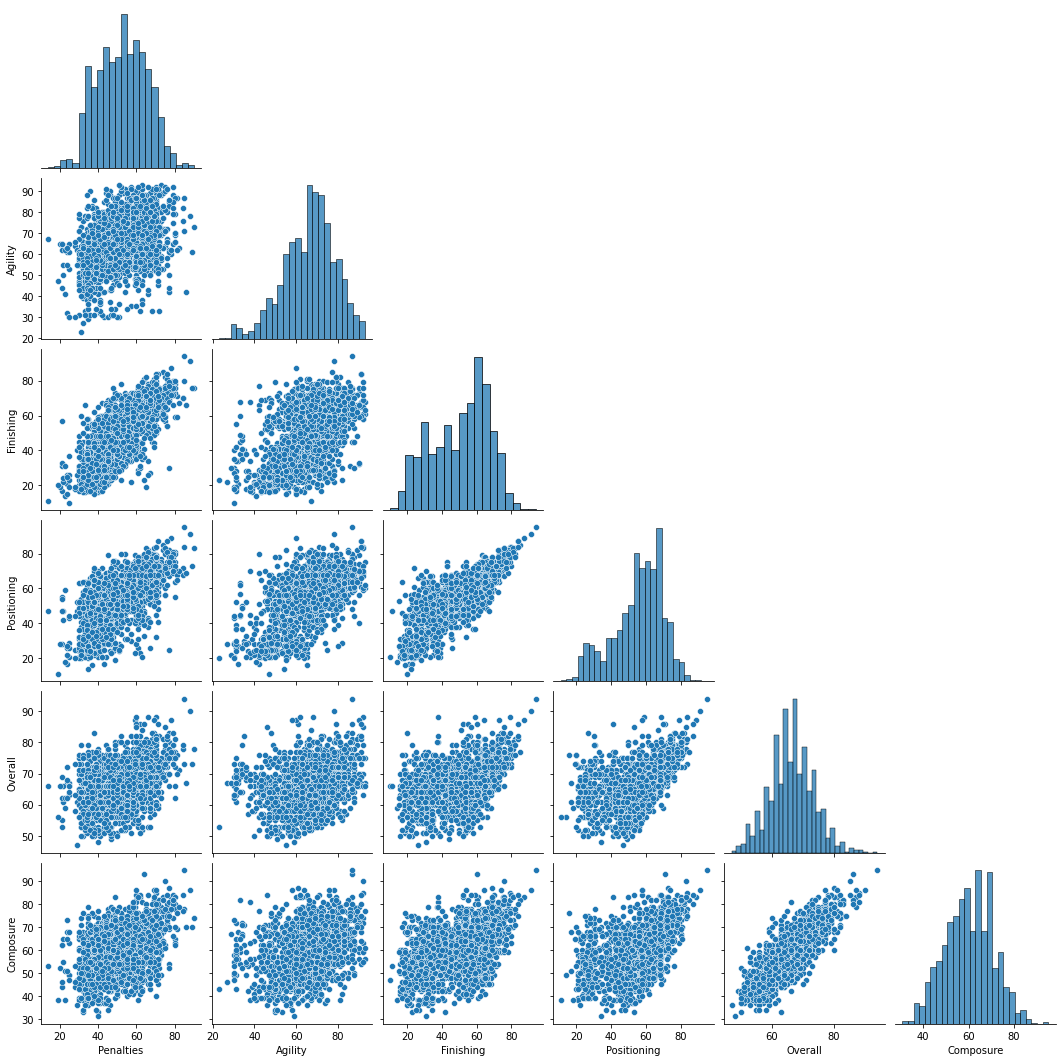

In [ ]:
# answer goes here
plt.figure(figsize=(20,20))
sample = soccer_data[['Penalties', 'Agility', 'Finishing', 'Positioning', 'Overall', 'Composure']].sample(n=(soccer_data.shape[0]//10))
sns.pairplot(sample, corner=True)
plt.show()

For the Chicago traffic crash data, we will consider the "DAMAGE" column to be the response of interest, and the other columns to be potential features. Most of the features are categorical, so we can use contingency table to identify potentially strong associations between categorical features and our categorical response.

Select one or two categorical variables that you suspect will have a strong relationship with the dollar amount of damages associated with a crash (we will choose TRAFFICWAY_TYPE), and print out the associated contigency table in two different forms:

- Raw data counts
- Percentage of total (i.e. the percentage of "OVER \$1500" for each level of a categorical variable)

Are there any particular categories within a particular feature that are strongly associated with higher damages? Are there any caveats to keep in mind with some of the more extreme values in the contingency table?

In [ ]:
crash_data.head()

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN
0,JC334993,7/4/2019 22:33,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",7/4/2019 23:05,FOLLOWING TOO CLOSELY,NOT APPLICABLE,300,N,LAKE SHORE DR SB,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JC370822,7/30/2019 10:22,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",7/30/2019 10:25,FAILING TO YIELD RIGHT-OF-WAY,IMPROPER TURNING/NO SIGNAL,8201,S,DR MARTIN LUTHER KING JR DR,631.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JC387098,8/10/2019 17:00,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",8/10/2019 17:35,EQUIPMENT - VEHICLE CONDITION,NOT APPLICABLE,6747,S,CREGIER AVE,332.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JC395195,8/16/2019 16:53,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"$501 - $1,500",8/16/2019 16:53,UNABLE TO DETERMINE,NOT APPLICABLE,554,N,FRANKLIN ST,1831.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,JC396604,8/17/2019 16:04,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"$501 - $1,500",8/17/2019 18:30,UNABLE TO DETERMINE,UNABLE TO DETERMINE,3700,N,WESTERN AVE,1921.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# answer goes here
cross_table = pd.crosstab(crash_data['DAMAGE'],
                           crash_data['WEATHER_CONDITION'])

cross_table

WEATHER_CONDITION,BLOWING SNOW,CLEAR,CLOUDY/OVERCAST,FOG/SMOKE/HAZE,FREEZING RAIN/DRIZZLE,OTHER,RAIN,SEVERE CROSS WIND GATE,SLEET/HAIL,SNOW,UNKNOWN
DAMAGE,,,,,,,,,,,
$500 OR LESS,3,40180,1628,95,22,128,4536,8,67,1621,1784
"$501 - $1,500",4,90742,3033,178,36,310,9508,20,161,3637,4963
"OVER $1,500",10,163903,6670,425,118,756,20651,56,365,7693,9274


In [ ]:
cross_table_perc = pd.crosstab(crash_data['DAMAGE'], crash_data['WEATHER_CONDITION']).apply(lambda x: x*100/x.sum(), axis=0)

cross_table_perc.T

DAMAGE,$500 OR LESS,"$501 - $1,500","OVER $1,500"
WEATHER_CONDITION,,,
BLOWING SNOW,17.647059,23.529412,58.823529
CLEAR,13.628424,30.778258,55.593318
CLOUDY/OVERCAST,14.367664,26.767276,58.865060
FOG/SMOKE/HAZE,13.610315,25.501433,60.888252
FREEZING RAIN/DRIZZLE,12.500000,20.454545,67.045455
OTHER,10.720268,25.963149,63.316583
RAIN,13.073930,27.404525,59.521545
SEVERE CROSS WIND GATE,9.523810,23.809524,66.666667
SLEET/HAIL,11.298482,27.150084,61.551433
